In [5]:
#Description: This program attempts to predict the future of ETH.
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

In [9]:
#loading the data
df=pd.read_csv('ethereum.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

In [10]:
#showing the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-11-15,2020-11-15,460.149902,460.994080,440.254333,447.559082,447.559082,10308617165
2020-11-16,2020-11-16,447.558990,463.831024,445.501617,459.940308,459.940308,11441239444
2020-11-17,2020-11-17,464.406647,482.232208,460.776611,480.360077,480.360077,14593057877
2020-11-18,2020-11-18,480.346832,491.999908,465.830963,479.484070,479.484070,17880199224
2020-11-19,2020-11-19,479.481018,480.121735,465.704254,471.630432,471.630432,12473929218
...,...,...,...,...,...,...,...
2021-11-11,2021-11-11,4635.453613,4778.059082,4580.990234,4730.384277,4730.384277,17933201129
2021-11-12,2021-11-12,4724.306641,4808.738770,4510.920410,4667.115234,4667.115234,18316060208
2021-11-13,2021-11-13,4666.719238,4702.115234,4582.180664,4651.460449,4651.460449,14457436261
2021-11-14,2021-11-14,4648.632813,4689.842773,4516.935547,4626.358887,4626.358887,12172962219


In [14]:
future_days=5
df[str(future_days)+'_Day_Price_Forecast']=df[['Close']].shift(-future_days)
df[['Close',str(future_days)+'_Day_Price_Forecast']]


,Close,5_Day_Price_Forecast
2020-11-15,447.559082,509.744568
2020-11-16,459.940308,549.486633
2020-11-17,480.360077,558.068115
2020-11-18,479.484070,608.454041
2020-11-19,471.630432,603.897766
...,...,...
2021-11-11,4730.384277,NaN
2021-11-12,4667.115234,NaN
2021-11-13,4651.460449,NaN
2021-11-14,4626.358887,NaN


In [16]:
x=np.array(df['Close'])
x=x[:df.shape[0]-future_days]
print(x)

[ 447.559082  459.940308  480.360077  479.48407   471.630432  509.744568
  549.486633  558.068115  608.454041  603.897766  570.686646  518.801147
  517.493713  538.229797  575.758057  614.842529  587.324158  598.352356
  616.70874   569.354187  596.595459  601.908997  591.843384  554.827759
  573.479126  559.678528  545.797363  568.567322  589.663208  586.011169
  589.355591  636.181824  642.868958  654.811951  659.297913  638.290833
  609.817871  634.854187  583.7146    611.607178  626.410706  635.835815
  682.642334  730.397339  731.520142  751.618958  737.803406  730.367554
  774.534973  975.50769  1040.233032 1100.006104 1207.112183 1225.678101
 1224.197144 1281.077271 1262.246704 1090.145386 1043.43457  1130.73938
 1218.453003 1171.834595 1233.537598 1230.172241 1257.279541 1377.295898
 1382.274048 1121.570923 1236.512207 1230.990601 1391.609375 1324.414795
 1357.058105 1253.187134 1298.101807 1382.522827 1376.115479 1314.986206
 1369.040527 1515.193726 1660.909546 1594.762695 171

In [19]:
y=np.array(df[str(future_days)+'_Day_Price_Forecast'])
y=y[:-future_days]
print(y)

[ 509.744568  549.486633  558.068115  608.454041  603.897766  570.686646
  518.801147  517.493713  538.229797  575.758057  614.842529  587.324158
  598.352356  616.70874   569.354187  596.595459  601.908997  591.843384
  554.827759  573.479126  559.678528  545.797363  568.567322  589.663208
  586.011169  589.355591  636.181824  642.868958  654.811951  659.297913
  638.290833  609.817871  634.854187  583.7146    611.607178  626.410706
  635.835815  682.642334  730.397339  731.520142  751.618958  737.803406
  730.367554  774.534973  975.50769  1040.233032 1100.006104 1207.112183
 1225.678101 1224.197144 1281.077271 1262.246704 1090.145386 1043.43457
 1130.73938  1218.453003 1171.834595 1233.537598 1230.172241 1257.279541
 1377.295898 1382.274048 1121.570923 1236.512207 1230.990601 1391.609375
 1324.414795 1357.058105 1253.187134 1298.101807 1382.522827 1376.115479
 1314.986206 1369.040527 1515.193726 1660.909546 1594.762695 1718.650879
 1677.846802 1614.227783 1746.616821 1768.035034 174

In [21]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
# SVR=Select Vector Machine
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.00001)
x_train=x_train.reshape(-1,1)
svr_rbf.fit(x_train,y_train)


SVR(C=1000.0, gamma=1e-05)

In [32]:
x_test=x_test.reshape(-1,1)
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print('svr_rbf accuracy:',svr_rbf_confidence)
svr_rbf_confidence_train=svr_rbf.score(x_train,y_train)
print('svr_rbf accuracy:',svr_rbf_confidence_train)

svr_rbf accuracy: 0.9206013572039257
svr_rbf accuracy: 0.9359448034225741


In [34]:
svr_prediction=svr_rbf.predict(x_test)
print(svr_prediction)

[3293.5915402  2248.2582865   564.95433048  597.31995836  609.59228677
 4536.12132369 1812.9222483  2501.66758344 2555.23610789 1804.45960948
 1857.85625555 2356.04554363 1244.75459642 1854.02370257 2820.96325194
 3421.89477992 1833.0526758  3404.89917159 3160.10739166 1827.26299914
 2500.61089328 3852.59257997 3226.78871771 1802.53151565 3227.55019061
 4491.25149022 2483.81983674 4569.14651722 1663.18204696 3217.80122662
 3430.74825218 2653.40369221 1811.26879281 2011.46570058 2331.25254972
 2474.25213231 1225.45203354 2501.08097241 2460.81719261  577.34445854
  738.68978808 3478.20982933 3227.23995018 2469.65583541 1805.17051606
 1296.33295822 4276.76546358 2508.76342884 2675.82416988 1802.65587027
 3472.59348858 2481.84735795 2702.14170398  688.91713895  574.60893297
 1972.46102167  620.4238054  2310.11759949 4653.04084019 3889.56528643
 1826.66936883 2953.32561689 1817.74090691 3684.74671292 3259.8370017
 3722.31578332 2457.08555476 2483.45164914  596.87638828 1770.38884187
 2882.7

In [35]:
print(y_test)

[2295.705566 2419.90625   517.493713  654.811951  608.454041 4521.581055
 2093.122803 1874.950073 2952.056152 1691.333984 2025.202759 1988.456299
 1130.73938  2124.776611 3062.265381 3563.759277 1978.894653 3077.86792
 2714.945313 1854.564331 2534.481689 3427.340088 3156.509521 2274.547607
 3391.694336 4486.243164 2773.207031 4626.358887 1723.153809 3001.678955
 3329.447998 2390.30542  1779.791016 2233.366699 2321.724121 2237.136963
 1382.274048 1888.44751  2890.94165   586.011169  583.7146   3847.104492
 3265.443359 2372.484375 1806.971802 1218.453003 3587.506104 2715.092773
 2353.768799 1937.449219 3785.848633 2537.891113 3167.856201  737.803406
  614.842529 2139.353271  575.758057 1994.331299 4730.384277 4324.626953
 1746.616821 3418.358643 1817.624146 3380.070068 3319.257324 4171.663574
 2198.58252  3157.23877   638.290833 1654.741577 2706.628906 2211.625732
 2945.892822]


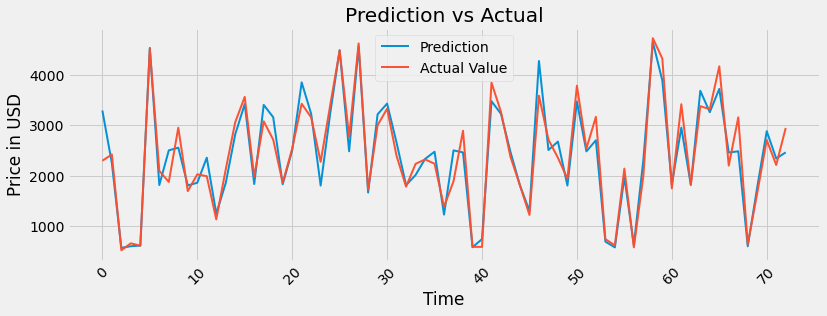

In [40]:
#visualize the data
plt.figure(figsize=(12,4))
plt.plot(svr_prediction,label='Prediction',lw=2,alpha=7)
plt.plot(y_test,label='Actual Value',lw=2,alpha=7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()
